# **به نام پروردگار هدایت کننده به راه راست**





# **Big Data Project**

## -amir-ali goli



> HW6 




[**GitHub** link](https://github.com/amirali079/LogisticRegression-with-Spark) : https://github.com/amirali079/LogisticRegression-with-Spark







## read file from drive




> با استفاده از کتابخانه‌های گوگل، فایل داده‌ها که در درایو هست را دانلود می‌کنیم






In [2]:
from google.colab import files
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

dataset_id = '19pPrU8hJ3jd_SgWbYNJ7lXssJlV4CpPs'


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

downloaded = drive.CreateFile({'id':dataset_id}) 
downloaded.GetContentFile('ML_hw_dataset.csv')  



## install spark





> در این مرحله اسپارک را نصب می‌کنیم





In [3]:
!pip install pyspark
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=eec1102ba00ec680794172ddc995b9913a06a8ea2fb073e7c6d2364dfdd800de
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


## read data frame and show




>  فایل لود شده در برنامه را با استفاده از کتابخانه‌های اسپارک درون دیتافریم می‌ریزیم

> سپس نمایش می‌دهیم همچنین در مرحله بعدی جزییات داده‌ها مثل نوع ستون‌های دریافتی را نیز گزارش می‌دهیم






In [4]:

df = spark.read.csv("ML_hw_dataset.csv", header=True, inferSchema=True)
df.show()

+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 44|blue-collar| married|         basic.4y|unknown|    yes|  no| cellular|  aug|        thu|     210|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.963|     5228.1|  0|
| 53| technician| married|          unknown|     no|     no|  no| cellular|  nov|        fri|     138|       1|  999|       0|nonexistent|        -0.1|          93.2|      

In [ ]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: integer (nullable = true)
 |-- marital_index: double (nullable = false)
 |-- education_index: double (nullable = false)
 |-- default_index: double (nullable = false)
 |-- housing_inde

## show statical information





> اطلاعات اماری هر ستون مثل تعداد داده‌ها، میانگین، انحراف معیار، کمینه و بیشینه را نمایش می‌دهیم





In [ ]:
df.describe().show()

+-------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+------------------+------------------+------------------+-------------------+--------+-------------------+------------------+------------------+------------------+-----------------+-------------------+
|summary|               age|    job| marital|education|default|housing| loan|  contact|month|day_of_week|          duration|          campaign|             pdays|           previous|poutcome|       emp_var_rate|    cons_price_idx|     cons_conf_idx|         euribor3m|      nr_employed|                  y|
+-------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+------------------+------------------+------------------+-------------------+--------+-------------------+------------------+------------------+------------------+-----------------+-------------------+
|  count|             41188|  41188|   41188|    41188|  41188|  41188|41188|  

## visualiztion with chart



```
با استفاده از تبدیل دیتافریم اسپارک به دیتافریم پانداز، بصری سازی داده‌ها را انجام می‌دهیم ابتدا نمودار هیستوگرام ستون‌ها را رسم کرده، 
```



```
سپس برای متغیرهای غیرعددی نمودار دایره‌ای و برای ستون‌های عددی نمودار جعبه‌ای رسم می‌کنیم

```



<ipython-input-77-54fa458af3c8>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.toPandas().hist(ax = ax1);


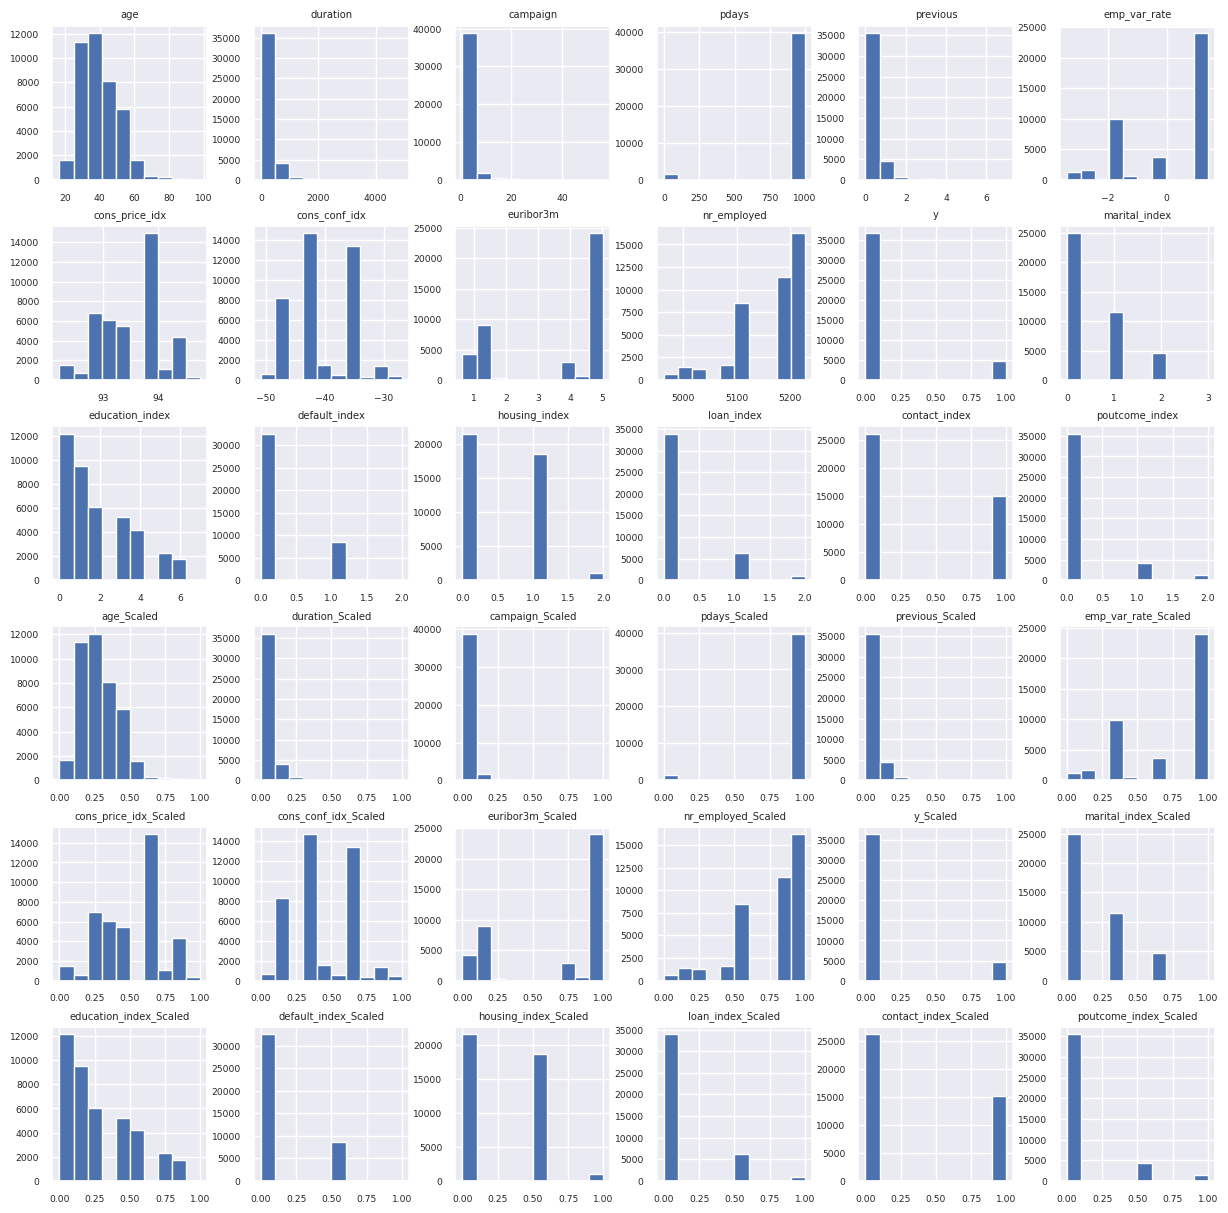

In [ ]:
fig1, ax1 = plt.subplots(figsize=(15, 15))
df.toPandas().hist(ax = ax1);

<Axes: ylabel='poutcome'>

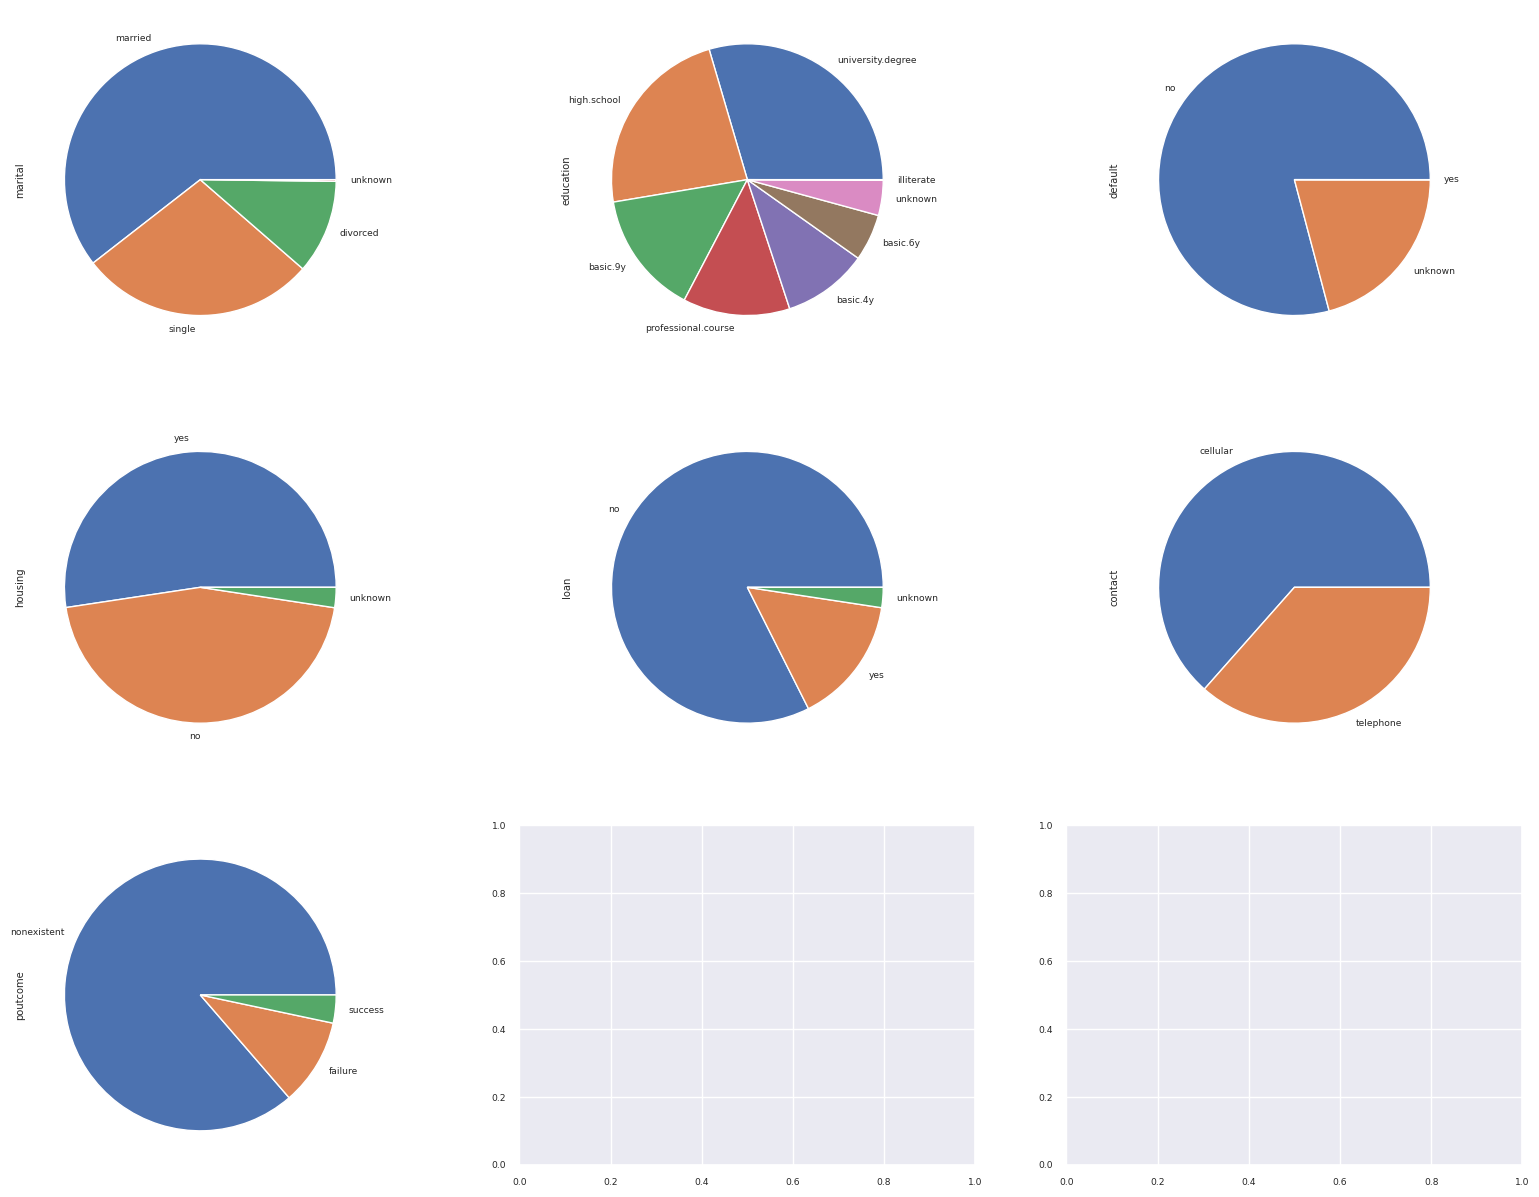

In [ ]:
pandas_df = df.toPandas()
fig2, ax2= plt.subplots(3, 3, figsize = (20, 15))
pandas_df['marital'].value_counts().plot.pie(ax = ax2[0, 0])
pandas_df['education'].value_counts().plot.pie(ax = ax2[0, 1])
pandas_df['default'].value_counts().plot.pie(ax = ax2[0, 2])
pandas_df['housing'].value_counts().plot.pie(ax = ax2[1, 0])
pandas_df['loan'].value_counts().plot.pie(ax = ax2[1, 1])
pandas_df['contact'].value_counts().plot.pie(ax = ax2[1, 2])
pandas_df['poutcome'].value_counts().plot.pie(ax = ax2[2, 0])

<Axes: >

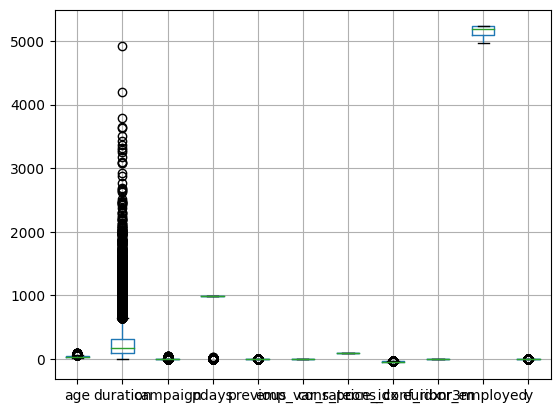

In [5]:
pandas_df = df.toPandas()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
pandas_df_num = pandas_df.select_dtypes(include=numerics)

pandas_df_num.boxplot(fontsize=10 )

## check for null values



```
با استفاده از دستور زیر  تعداد میسینگ ولیوهای هر ستون را پیدا میکنیم
```



```
همانطور که در پاسخ مشاهده می‌شود هیچکدام از ستون‌ها مقدار نال و میسنگ ولیو ندارند
```



In [6]:
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|  0|  0|      0|        0|      0|      0|   0|      0|    0|          0|       0|       0|    0|       0|       0|           0|             0|            0|        0|          0|  0|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+



## Remove outliers from numeric columns

```
سپس برای ستون‌های عددی داده‌های پرت و نویزی را نیز حذف می‌کنیم تا تحلیل دقیقتر شود
```

```
فقط باید توجه داشت که نباید برای ستون لیبل یا وای، این کار را انجام داد چون باید بدون تغییر بماند
```



In [7]:
from pyspark.sql.functions import col, avg, stddev

numeric_columns=[c for c ,t in df.dtypes if t in ['int','double','float','long']]

for column in numeric_columns:
   meanOfColumn = df.agg(avg(column)).collect()[0][0]
   stddevOfColumn =df.agg(stddev(column)).collect()[0][0]
   lower_bound = meanOfColumn - 3 * stddevOfColumn
   upper_bound = meanOfColumn + 3 * stddevOfColumn
  
   if column != 'y':
    df=df.filter((col(column) >= lower_bound) & (col(column)<=upper_bound))

df.show()  

+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 44|blue-collar| married|           basic.4y|unknown|    yes|  no| cellular|  aug|        thu|     210|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.963|     5228.1|  0|
| 53| technician| married|            unknown|     no|     no|  no| cellular|  nov|        fri|     138|       1|  999|       0|nonexistent|        -0.1|          9

## Cast categorical columns to numeric


```
ستون‌های غیر عددی را به عددی تبدیل کرده تا بتوانیم کوریلیشن ها را حساب کنیم
```



In [8]:
from pyspark.ml.feature import StringIndexer

categorical_columns = [ 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for column in categorical_columns:
  indexer = StringIndexer(inputCol=column, outputCol=column+"_index")
  df = indexer.fit(df).transform(df)
    

df.show()

+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+-------------+---------------+-------------+-------------+----------+-------------+--------------+
|age|        job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|marital_index|education_index|default_index|housing_index|loan_index|contact_index|poutcome_index|
+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+-------------+---------------+-------------+-------------+----------+-------------+--------------+
| 44|blue-collar| married|           basic.4y|unknown|    yes|  no| cellular|  

## normalize numeric data


```
حال که همه ‌ٔداده‌ها عددی شدند، همه آن‌ها را نرمالسازی می‌کنیم
```


```
مقدارهای نرمال شده در ستون‌های جدید قرار می‌گیرند 
```



In [9]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# UDF for converting column type from vector to double type
unlist = udf(lambda x: round(float(list(x)[0]),3), DoubleType())


numeric_columns=[c for c ,t in df.dtypes if t in ['int','double','float','long']]
print(numeric_columns)

for i in numeric_columns:
    # VectorAssembler Transformation - Converting column to vector type
    assembler = VectorAssembler(inputCols=[i],outputCol=i+"_Vect")

    # MinMaxScaler Transformation
    scaler = MinMaxScaler(inputCol=i+"_Vect", outputCol=i+"_Scaled")

    # Pipeline of VectorAssembler and MinMaxScaler
    pipeline = Pipeline(stages=[assembler, scaler])

    # Fitting pipeline on dataframe
    df = pipeline.fit(df).transform(df).withColumn(i+"_Scaled", unlist(i+"_Scaled")).drop(i+"_Vect")

df.show()
# Source : https://stackoverflow.com/questions/40337744/scalenormalise-a-column-in-spark-dataframe-pyspark

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'marital_index', 'education_index', 'default_index', 'housing_index', 'loan_index', 'contact_index', 'poutcome_index']
+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+-------------+---------------+-------------+-------------+----------+-------------+--------------+----------+---------------+---------------+------------+---------------+-------------------+---------------------+--------------------+----------------+------------------+--------+--------------------+----------------------+--------------------+--------------------+-----------------+--------------------+---------------------+
|age|        job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campai

## Calculating feature correlation


```
کوریلیشن را برای ستون‌های نرمال شده و ستون‌های نرمال نشده محاسبه می‌کنیم
```


```
همانطور که مشاهده می‌شود تفاوت چندانی بینشان وجود ندارد
```



In [10]:
selected_Scaled_cols=['age_Scaled','duration_Scaled','campaign_Scaled','pdays_Scaled','previous_Scaled','emp_var_rate_Scaled','cons_price_idx_Scaled','cons_conf_idx_Scaled','euribor3m_Scaled','nr_employed_Scaled','marital_index_Scaled','education_index_Scaled','default_index_Scaled','housing_index_Scaled','loan_index_Scaled','contact_index_Scaled','poutcome_index_Scaled','y_Scaled']
selected_cols=['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed','marital_index', 'education_index', 'default_index', 'housing_index', 'loan_index', 'contact_index', 'poutcome_index','y']

corr_matrix = df.select(selected_cols).toPandas().corr()
corr_matrix_Scaled = df.select(selected_Scaled_cols).toPandas().corr()

corr_matrix_Scaled

,age_Scaled,duration_Scaled,campaign_Scaled,pdays_Scaled,previous_Scaled,emp_var_rate_Scaled,cons_price_idx_Scaled,cons_conf_idx_Scaled,euribor3m_Scaled,nr_employed_Scaled,marital_index_Scaled,education_index_Scaled,default_index_Scaled,housing_index_Scaled,loan_index_Scaled,contact_index_Scaled,poutcome_index_Scaled,y_Scaled
age_Scaled,1.000000,-0.000152,0.007077,NaN,-0.020032,0.071599,0.041954,0.118011,0.083729,0.068749,-0.120317,0.168386,0.197256,0.004902,-0.006444,0.034058,-0.020032,-0.017838
duration_Scaled,-0.000152,1.000000,-0.059013,NaN,-0.014356,-0.020948,0.002846,-0.007970,-0.024077,-0.033978,0.001661,0.009187,-0.001891,0.007279,-0.012846,-0.023091,-0.014356,0.393174
campaign_Scaled,0.007077,-0.059013,1.000000,NaN,-0.054656,0.101480,0.084515,0.003448,0.081994,0.094547,0.011626,0.004552,0.022308,0.004995,0.007494,0.049899,-0.054656,-0.043730
pdays_Scaled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_Scaled,-0.020032,-0.014356,-0.054656,NaN,1.000000,-0.391253,-0.340387,-0.218682,-0.388888,-0.357596,0.028824,-0.015978,-0.063277,-0.018715,0.004229,-0.206742,1.000000,0.029600
emp_var_rate_Scaled,0.071599,-0.020948,0.101480,NaN,-0.391253,1.000000,0.818511,0.384511,0.978608,0.943573,-0.047576,0.054961,0.178961,0.057846,-0.000757,0.380186,-0.391253,-0.242337
cons_price_idx_Scaled,0.041954,0.002846,0.084515,NaN,-0.340387,0.818511,1.000000,0.232764,0.770958,0.672153,-0.031839,0.098663,0.174567,0.089559,0.004646,0.636279,-0.340387,-0.159080
cons_conf_idx_Scaled,0.118011,-0.007970,0.003448,NaN,-0.218682,0.384511,0.232764,1.000000,0.445062,0.262012,-0.060095,-0.012597,0.053630,0.037576,-0.003857,0.320377,-0.218682,-0.007356
euribor3m_Scaled,0.083729,-0.024077,0.081994,NaN,-0.388888,0.978608,0.770958,0.445062,1.000000,0.957290,-0.051505,0.045444,0.166075,0.056592,-0.002354,0.385143,-0.388888,-0.235415
nr_employed_Scaled,0.068749,-0.033978,0.094547,NaN,-0.357596,0.943573,0.672153,0.262012,0.957290,1.000000,-0.044504,0.034838,0.157044,0.042886,-0.002591,0.242269,-0.357596,-0.258636


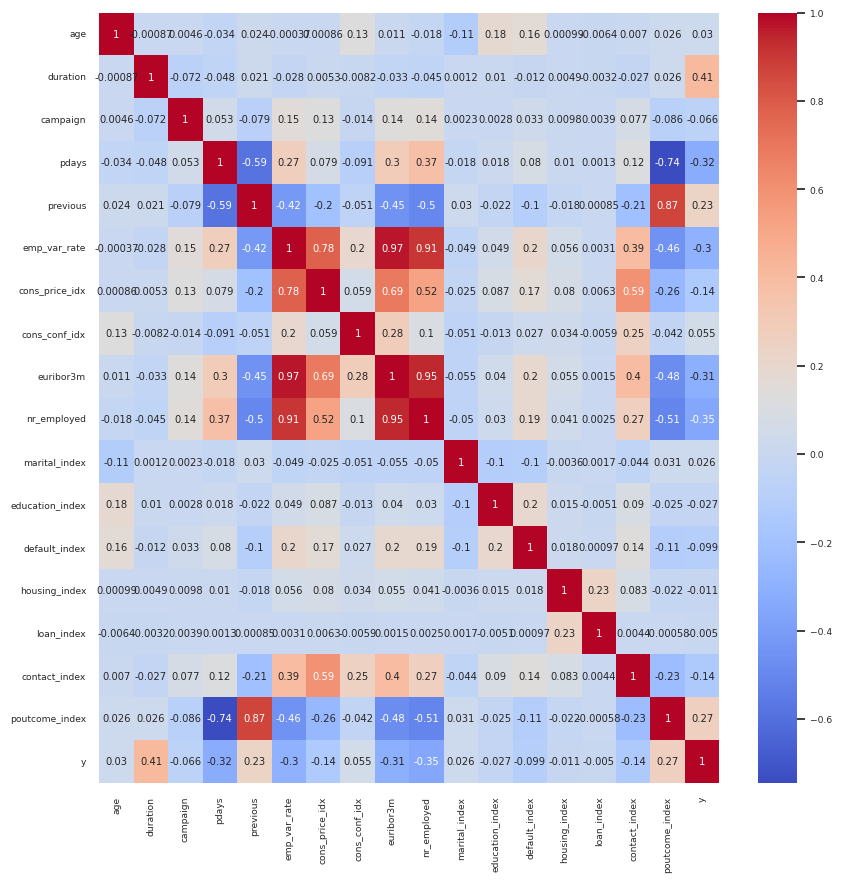

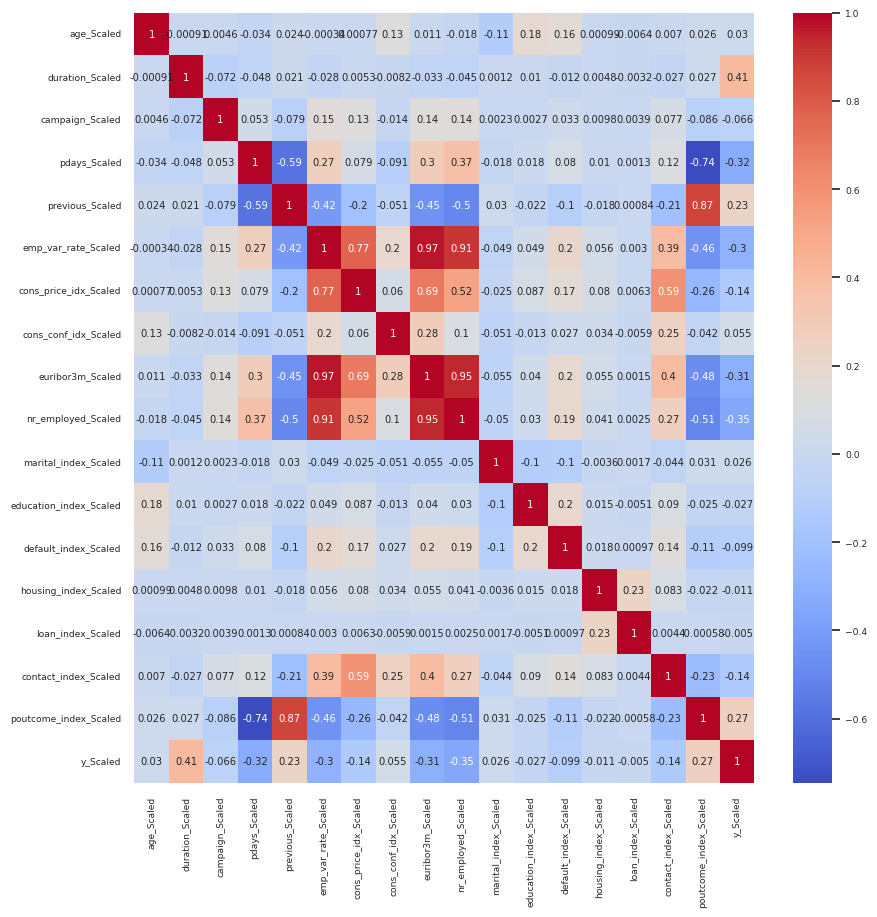

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=0.6)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

sns.set(font_scale=0.6)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix_Scaled, cmap='coolwarm', annot=True)
plt.show()

## feature selection and run alorithm



```
در این مرحله باتوجه به کوریلیشن ستون‌های دیگر با ستون لیبل وای، فیچرهارا انتخاب میکنیم
```



```
سه تا از ستون‌هایی که کوریلیشن آن‌ها با ستون لیبل وای ، مثبت و عددی بزرگتری است را انتخاب می‌کنیم
```



```
سپس مدل را آموزش داده برای این کار ۷۰ درصد داده‌ها را برای آموزش انتخاب کرده و ۳۰ درصد آن را نز برای تست می‌گذاریم
```




In [23]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import LinearSVC
from pyspark.ml.feature import StandardScaler

assembler = VectorAssembler(inputCols =["duration_Scaled", "previous_Scaled", "poutcome_index_Scaled"], outputCol='features')
output = assembler.transform(df)
finalised_data = output.select('features', 'y')
finalised_data.show()
train, test = finalised_data.randomSplit([0.7, 0.3])
print(str(train.count()),str(test.count()))


lr = LogisticRegression(featuresCol='features',labelCol="y",maxIter=5)
lrn = lr.fit(train)
lrn_summary = lrn.summary
lrn_summary.predictions.show()

svm = LinearSVC(labelCol="y", maxIter=50, regParam=0.1)
svm_model = svm.fit(train)

+---------------+---+
|       features|  y|
+---------------+---+
|[0.203,0.0,0.0]|  0|
|[0.133,0.0,0.0]|  0|
|[0.178,0.0,0.0]|  0|
|[0.066,0.0,0.0]|  0|
|[0.197,0.0,0.0]|  0|
|[0.184,0.0,0.0]|  0|
|[0.184,1.0,1.0]|  0|
| [0.06,0.0,0.0]|  0|
|[0.761,0.0,0.0]|  0|
|[0.359,0.0,0.0]|  1|
|[0.072,0.0,0.0]|  0|
|[0.985,0.0,0.0]|  0|
|[0.113,0.0,0.0]|  0|
|[0.997,0.0,0.0]|  1|
|[0.521,0.0,0.0]|  1|
|[0.135,0.0,0.0]|  0|
|  [0.1,0.0,0.0]|  0|
|[0.237,1.0,1.0]|  0|
|[0.328,0.0,0.0]|  0|
|[0.034,0.0,0.0]|  0|
+---------------+---+
only showing top 20 rows

29460 7240
+---------------+---+--------------------+--------------------+----------+
|       features|  y|       rawPrediction|         probability|prediction|
+---------------+---+--------------------+--------------------+----------+
|      (3,[],[])|0.0|[4.31780728468190...|[0.98684624898142...|       0.0|
|      (3,[],[])|0.0|[4.31780728468190...|[0.98684624898142...|       0.0|
|      (3,[],[])|0.0|[4.31780728468190...|[0.98684624898142.

## evaluate Model



```
در نهایت ارزیابی مدل را توسط سه پارامتر اصلی پرسیژن، ریکال و اکیوریسی انجام می‌دهیم و به اعداد خوب و مناسبی می‌رسیم
```



```
در مورد مقایسه نتایج دو الگوریتم باید ذکر کرد که الگوریتم لاجستیک رگرشن اعداد مناسب تری برای پرسیژن داشت و برای دو معیار دیگر با اختلاف کمی باز هم بهتر بود
```




In [24]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


predictions = lrn.transform(test)

evaluator = MulticlassClassificationEvaluator(labelCol="y", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator.evaluate(predictions)

evaluator = MulticlassClassificationEvaluator(labelCol="y", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(predictions)

evaluator = MulticlassClassificationEvaluator(labelCol="y", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)


print("Accuracy = %g" % accuracy)
print("Precision = %g" % precision)
print("Recall = %g" % recall)


Accuracy = 0.927624
Precision = 0.907067
Recall = 0.927624


In [25]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


predictions = svm_model.transform(test)

evaluator = MulticlassClassificationEvaluator(labelCol="y", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator.evaluate(predictions)

evaluator = MulticlassClassificationEvaluator(labelCol="y", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(predictions)

evaluator = MulticlassClassificationEvaluator(labelCol="y", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)


print("Accuracy = %g" % accuracy)
print("Precision = %g" % precision)
print("Recall = %g" % recall)


Accuracy = 0.925967
Precision = 0.857415
Recall = 0.925967


## Model without preprocessing



```
همانطور که مشاهده‌ می‌شود بدون پیشپردازش و فقط با تبدیل داده‌های غیرعددی به عددی به همان کوریلیشن‌ها و همان فیچرهای که باید انتخاب شود می‌رسیم
```



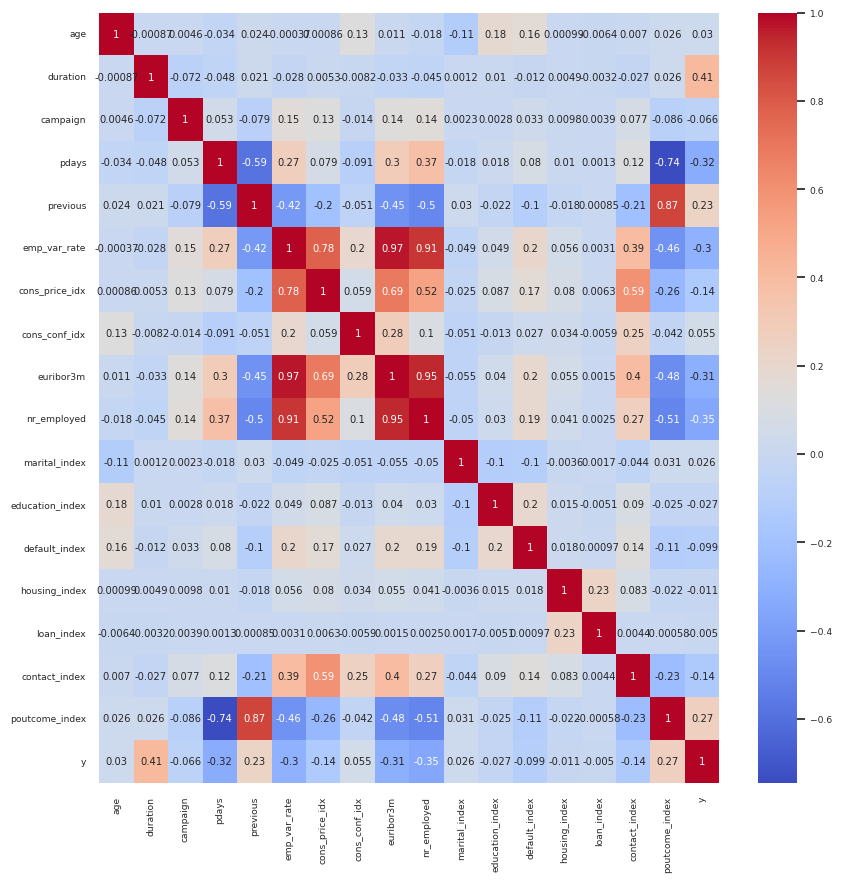

In [ ]:
df_wp = spark.read.csv("ML_hw_dataset.csv", header=True, inferSchema=True)

from pyspark.ml.feature import StringIndexer
categorical_columns_wp = [ 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for column in categorical_columns_wp:
  indexer = StringIndexer(inputCol=column, outputCol=column+"_index")
  df_wp = indexer.fit(df_wp).transform(df_wp)

selected_cols_wp=['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed','marital_index', 'education_index', 'default_index', 'housing_index', 'loan_index', 'contact_index', 'poutcome_index','y']
corr_matrix_wp = df_wp.select(selected_cols_wp).toPandas().corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=0.6)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix_wp, cmap='coolwarm', annot=True)
plt.show()